# Python Data Analysis and Visualization - Quick guide notes

Here is my notes of learning python data analysis based on astronomical data, so just used if you want to learn more how you can use it in development :)

## 1. Tabular Data

First of all, let's learn how we can work with tabular data and how we can analyse tables - such as Exel or CSV (it's really common way to save some big amount of data).

### 1.1 Install all dependencies and import libratirs

Before we gonna begin, let's **install all dependencies** that we need:

In [1]:
# Run this command to install all libraries for development
%pip install -q pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Time to explore dataset

All data files which we are going to read in this notebook are saved inside the `data` folder. Let's read CSV file and create a pandas dataframe and let's see which functions we can use to work with dataframes.

In [3]:
# First, let's read CSV file that we need
star_df = pd.read_csv('data/cleaned_star_data.csv') # It will create a dataframe
star_df.head() # Show first 5 rows of dataframe

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
# Get 10 random rows from this table dataframe
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
128,2856,0.000896,0.0782,19.560,0,Red,M
126,2935,0.000870,0.0932,16.880,0,Red,M
226,9892,593900.000000,80.0000,-7.262,4,Blue,O
211,10012,552.000000,5.8560,0.013,3,Blue-White,A
3,2800,0.000200,0.1600,16.650,0,Red,M
178,12100,120000.000000,708.9000,-7.840,5,Blue-White,B
111,3605,126000.000000,1124.0000,-10.810,5,Red,M
187,3484,0.000551,0.0998,16.670,0,Red,M
168,17383,342900.000000,30.0000,-6.090,4,Blue,O
212,13089,788.000000,5.9920,-0.120,3,Blue-White,A


In [5]:
# Get general information from the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### 1.3 Save visualizations

In [6]:
# Create directory for visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)

In [7]:
base_dir = f'{folder_name}/'

### 1.4 Visualize the count of stars for each type

In [8]:
# Show all star types (presented by number)
star_df['Star type']

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [9]:
# Count all star types in data frame
star_df['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

#### Matplotlib for bar char

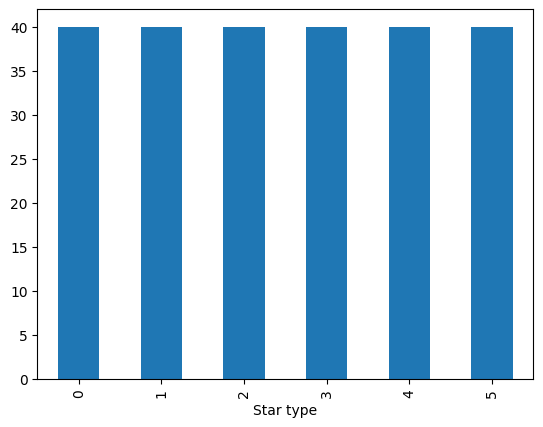

In [10]:
# Now let's visualize all this data by matplolib
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

### 1.5 Customize plot visualization

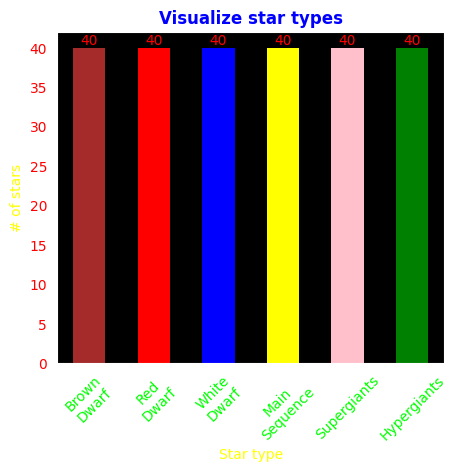

In [11]:
# Customize plot
plt.figure(figsize=(5,4.3)) # Change default size of plot
plt.style.use('dark_background') # Change default background color, set 'default' for default style
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'blue', 'yellow', 'pink', 'green']) # Show bar plot and change bar colors
ax.bar_label(ax.containers[0], color='red') # Show bar plot value labels for X and change label color
plt.title('Visualize star types', color='blue', weight='bold') # Add title to the plot and make it blue/bold
plt.ylabel('# of stars', color='yellow') # Add name for y label
plt.yticks(color='red') # Change color of the y ticks
plt.xticks(color='lime',
           ticks=[0, 1, 2, 3, 4, 5],
           labels=["Brown\nDwarf", "Red\nDwarf", "White\nDwarf", "Main\nSequence", "Supergiants", "Hypergiants"],
           rotation=45)
plt.xlabel('Star type', color='yellow') # Do the same thing that we did for y label
plt.savefig(base_dir+"barplot_star_count.png")
plt.show()

### 1.6 Use seaborn to create char bar easily

In [12]:
# Get stars colors count data
star_df['Star color'].value_counts()

Star color
Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: count, dtype: int64

In [13]:
# Get stars count indexes
star_df['Star color'].value_counts().index

Index(['Red', 'Blue', 'Blue-White', 'Yellow-White', 'White'], dtype='object', name='Star color')

<Axes: xlabel='Star color', ylabel='count'>

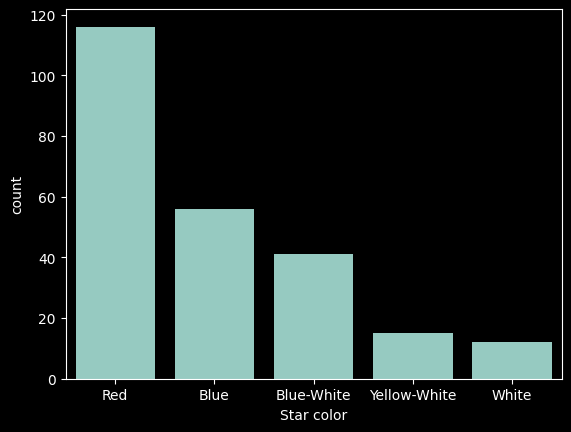

In [14]:
# Now let's create a barplot by using seaborn library
sns.barplot(x=star_df['Star color'].value_counts().index, y=star_df['Star color'].value_counts())